In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

random.seed(42)
np.random.seed(42)
df = pd.read_csv('data.csv')
x_coords = df['XCOORD'].tolist()
y_coords = df['YCOORD'].tolist()
ready_time = df['READYTIME'].tolist()
due_time = df['DUETIME'].tolist()
profit = [random.randint(1, 50) for _ in range(101)]
num_customers = len(df)
distance_matrix = np.zeros((num_customers, num_customers))

for i in range(num_customers):
    for j in range(num_customers):
        if i != j:
            distance_matrix[i][j] = np.sqrt((x_coords[i] - x_coords[j]) ** 2 + (y_coords[i] - y_coords[j]) ** 2)

In [6]:
def calculate_time(individual):
    total_distance = 0
    violation_time = 0
    for i in range(len(individual)-1):
        if total_distance <= ready_time[individual[i]]:
            violation_time += ready_time[individual[i]] - total_distance
        if total_distance > due_time[individual[i]]:
            violation_time += total_distance - due_time[individual[i]]
        total_distance += distance_matrix[individual[i]][individual[i + 1]]
    return violation_time

def calculate_profit(individual):
    profit_sum = 0
    for order, index in enumerate(individual):
      profit_sum += profit[index] * (1 - order / 101)
    return profit_sum

def calculate_distance(individual):
    total_distance = 0
    for i in range(len(individual) - 1):
        total_distance += distance_matrix[individual[i]][individual[i + 1]]
    total_distance += distance_matrix[individual[-1]][individual[0]]
    return total_distance

def mul_obj_tsp(individual):
    return calculate_distance(individual), calculate_profit(individual), calculate_time(individual)

In [7]:
creator.create("FitnessMulti", base.Fitness, weights=(-1.0, 1.0, -1.0))

creator.create("Individual", list, fitness=creator.FitnessMulti)
toolbox = base.Toolbox()

toolbox.register("indices", random.sample, range(num_customers), num_customers)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", mul_obj_tsp)

toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1)
toolbox.register("select", tools.selNSGA2)

E:\Anaconda3\envs\torch\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
E:\Anaconda3\envs\torch\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [8]:
population = toolbox.population(n=800)

fitnesses = map(toolbox.evaluate, population)
for ind, fit in zip(population, fitnesses):
    ind.fitness.values = fit

num_generations = 1000
cxpb, mutpb = 0.7, 0.2

algorithms.eaMuPlusLambda(population, toolbox, mu=100, lambda_=200, cxpb=cxpb, mutpb=mutpb, ngen=num_generations, stats=None,   
                          halloffame=None, verbose=True)

pareto_front = tools.sortNondominated(population, len(population), first_front_only=True)[0]
for ind in pareto_front:
    print("Distance:", ind.fitness.values[0], "Profit:", ind.fitness.values[1], "Time:", ind.fitness.values[2])

gen	nevals
0  	0     
1  	175   
2  	177   
3  	179   
4  	176   
5  	182   
6  	186   
7  	182   
8  	177   
9  	179   
10 	178   
11 	174   
12 	177   
13 	190   
14 	183   
15 	175   
16 	183   
17 	179   
18 	181   
19 	182   
20 	183   
21 	182   
22 	180   
23 	184   
24 	183   
25 	181   
26 	181   
27 	180   
28 	176   
29 	183   
30 	172   
31 	183   
32 	173   
33 	179   
34 	177   
35 	183   
36 	177   
37 	182   
38 	176   
39 	181   
40 	183   
41 	181   
42 	173   
43 	181   
44 	179   
45 	184   
46 	178   
47 	185   
48 	181   
49 	178   
50 	180   
51 	184   
52 	178   
53 	179   
54 	180   
55 	173   
56 	180   
57 	178   
58 	180   
59 	178   
60 	183   
61 	181   
62 	181   
63 	178   
64 	183   
65 	179   
66 	179   
67 	179   
68 	168   
69 	184   
70 	180   
71 	182   
72 	187   
73 	179   
74 	174   
75 	180   
76 	184   
77 	180   
78 	179   
79 	177   
80 	184   
81 	181   
82 	183   
83 	187   
84 	178   
85 	179   
86 	186   
87 	176   
88 	180   
89 	183   

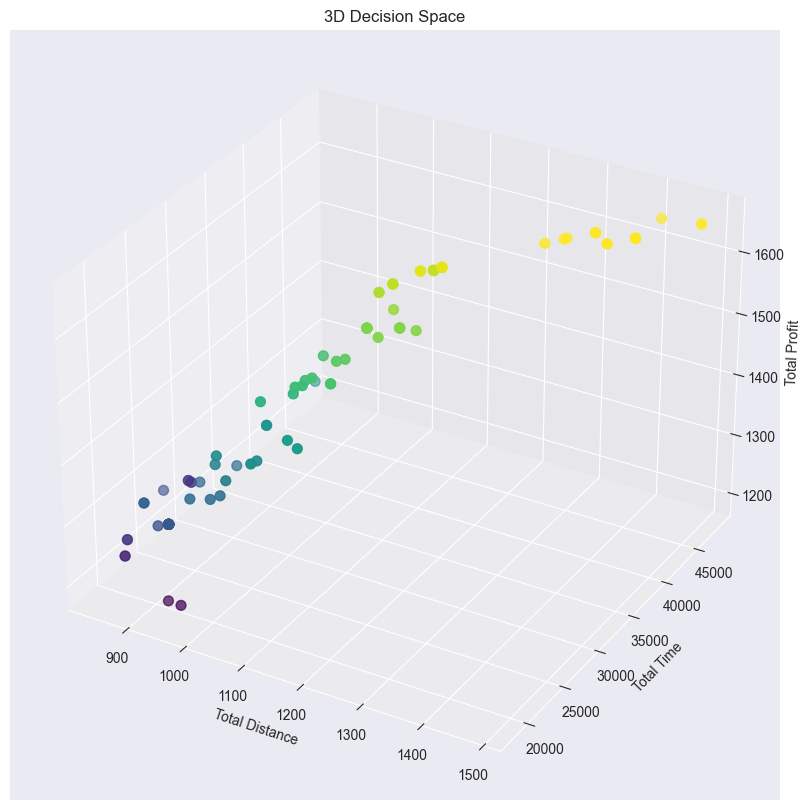

In [9]:
import matplotlib.pyplot as plt

distances = [ind.fitness.values[0] for ind in pareto_front]
times = [ind.fitness.values[2] for ind in pareto_front]
profits = [ind.fitness.values[1] for ind in pareto_front]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(distances, times, profits, c=profits, cmap='viridis', marker='o', s=50)

ax.set_xlabel('Total Distance')
ax.set_ylabel('Total Time')
ax.set_zlabel('Total Profit')
ax.set_title('3D Decision Space')
ax.grid(True)
plt.savefig('fig11.png')
plt.show()